In [1]:
import pandas as pd
import sys
sys.path.append("../src/")
import utils as ut
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = "../data/two_baths/"
h = 0.005
T = 20
n = int(T/h)
t = np.arange(0, T, h)

In [3]:
#TODO: Run simulations until 500, what's the time unit?

In [4]:
#TODO: Numerical Fourier transform for oscilatory cases https://medium.com/@khairulomar/deconstructing-time-series-using-fourier-transform-e52dd535a44e

In [5]:
#TODO: compare speed and results using smaller h 

In [6]:
#TODO: Is it possible to save an image of the system and continue solving from that state? Check methods

In [7]:
#TODO: Universal behaviours? Same plot, where do the regime separate?

In [8]:
#TODO: Add t², t, and other trend lines

In [13]:
def plot_msd(A, eta, C, theta_12, theta_H):
    suffix = f"A{A}-eta{eta}-C{C}-t12_{theta_12}-tH{theta_H}"
    files = [nm for nm in os.listdir(data_path) if suffix in nm]
    files.sort()
    width = 3
    try:
        fig, ax = plt.subplots(len(files), 2, figsize = (2*width, len(files)*width))
        for n, f in enumerate(files):
            h = float(f[f.find("h")+2 : f.find("A")-1])
            print(h)
            df = ut.read_hdf5_data(data_path + f)
            ax[n,0].plot(t, df)
            ax[n,0].set_title("H = " + str(h))
            ax[n,0].set_xscale('log')
            ax[n,0].set_yscale('log')
            ax[n,1].plot(t, df)
            ax[n,1].set_title("H = " + str(h))

            
        fig.tight_layout()
    
    except:
        print("No files for case")

$$  A \frac{dq^2}{dt^2} + \eta \space {}^{C}_{O}D^{\beta}_{t}q(t) + C \frac{dq}{dt} = \theta_H \xi_H + \theta_{1/2}\xi_{1/2}$$

## Case 1:

$  A \frac{dq^2}{dt^2} + \eta \space {}^{C}_{O}D^{\beta}_{t}q(t) =  \theta_{1/2}\xi_{1/2}$

Time glass: $C = 0$, $\theta_H = 0$

* Order of the dervative: $\beta \in [0.05, 0.1]$. 
* Hurst: $\beta = 2 - 2H$, $H \in [0.95, 0.975]$


0.95
0.955
0.96
0.965
0.97
0.975


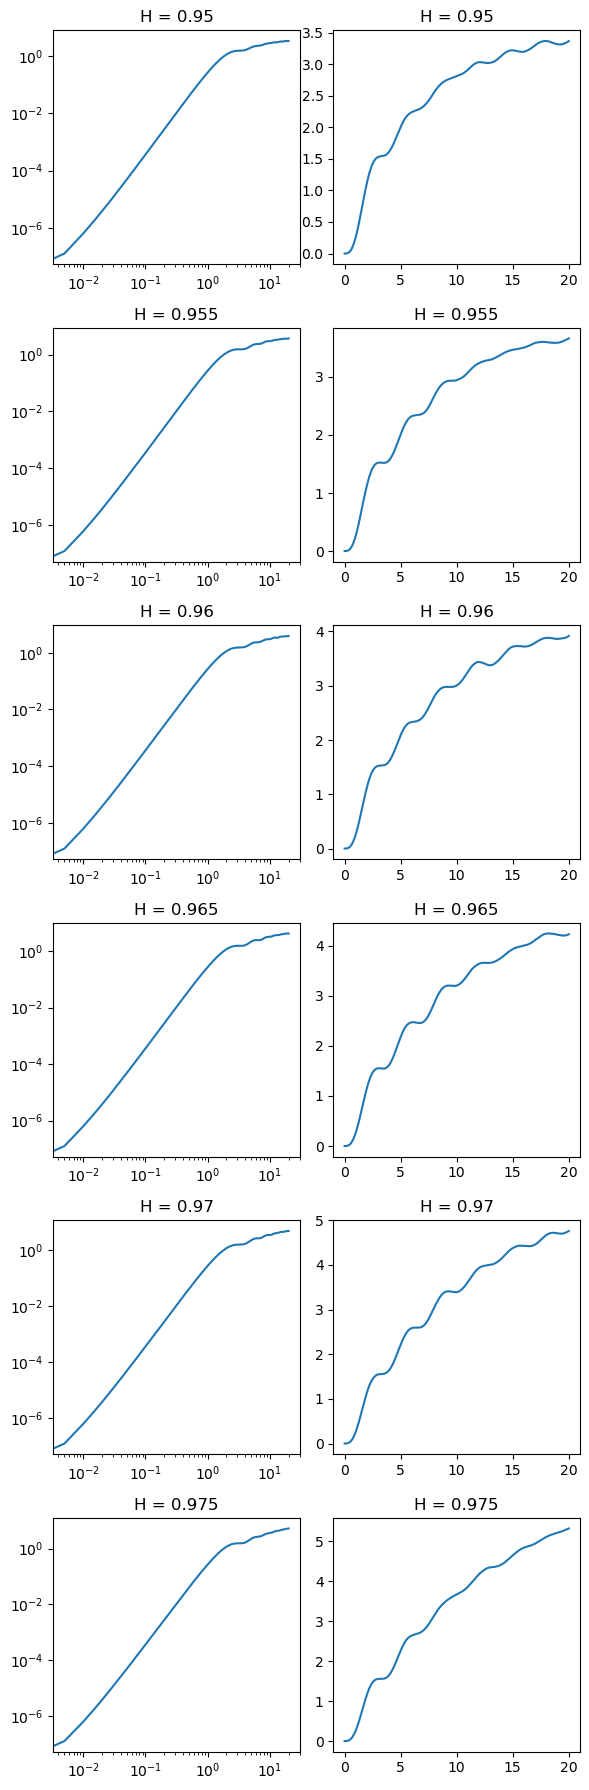

In [15]:
A = 1.0
eta = 1.0
C = 0.0
theta_H = 0.0
theta_12 = 1.0

plot_msd(A, eta, C, theta_12, theta_H)



## Case 2

$  A \frac{dq^2}{dt^2} + \eta \space {}^{C}_{O}D^{\beta}_{t}q(t) = \theta_H \xi_H $

Lutz: $C = 0$, $\theta_{1/2} = 0$

* Oscilations: $\beta \in [0, 0.1]$
* Hurst: $H \in [0.95, 1)$


0.95
0.955
0.96
0.965
0.97
0.975


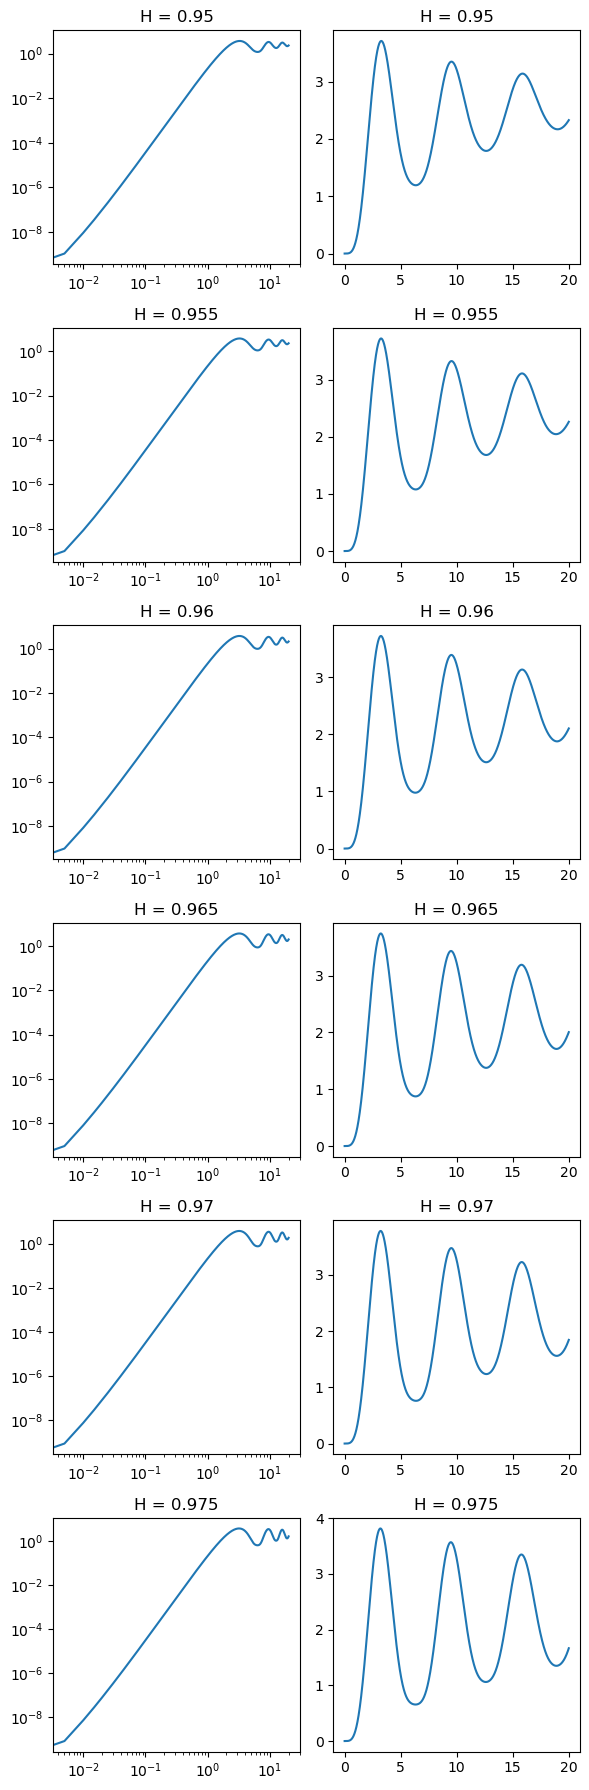

In [19]:
A = 1.0
eta = 1.0
C = 0.0
theta_H = 1.0
theta_12 = 0.0

plot_msd(A, eta, C, theta_12, theta_H)


## Case 3 

$  A \frac{dq^2}{dt^2} + C \frac{dq}{dt} = \theta_H \xi_H $

oBm + coloured noise: $\eta = 0$, $\theta_{1/2} = 0$

* Entire regime: $H \in [0, 1]$


0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.99


/tmp/ipykernel_100550/868147034.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[n,0].set_xscale('log')
/tmp/ipykernel_100550/868147034.py:15: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[n,0].set_yscale('log')


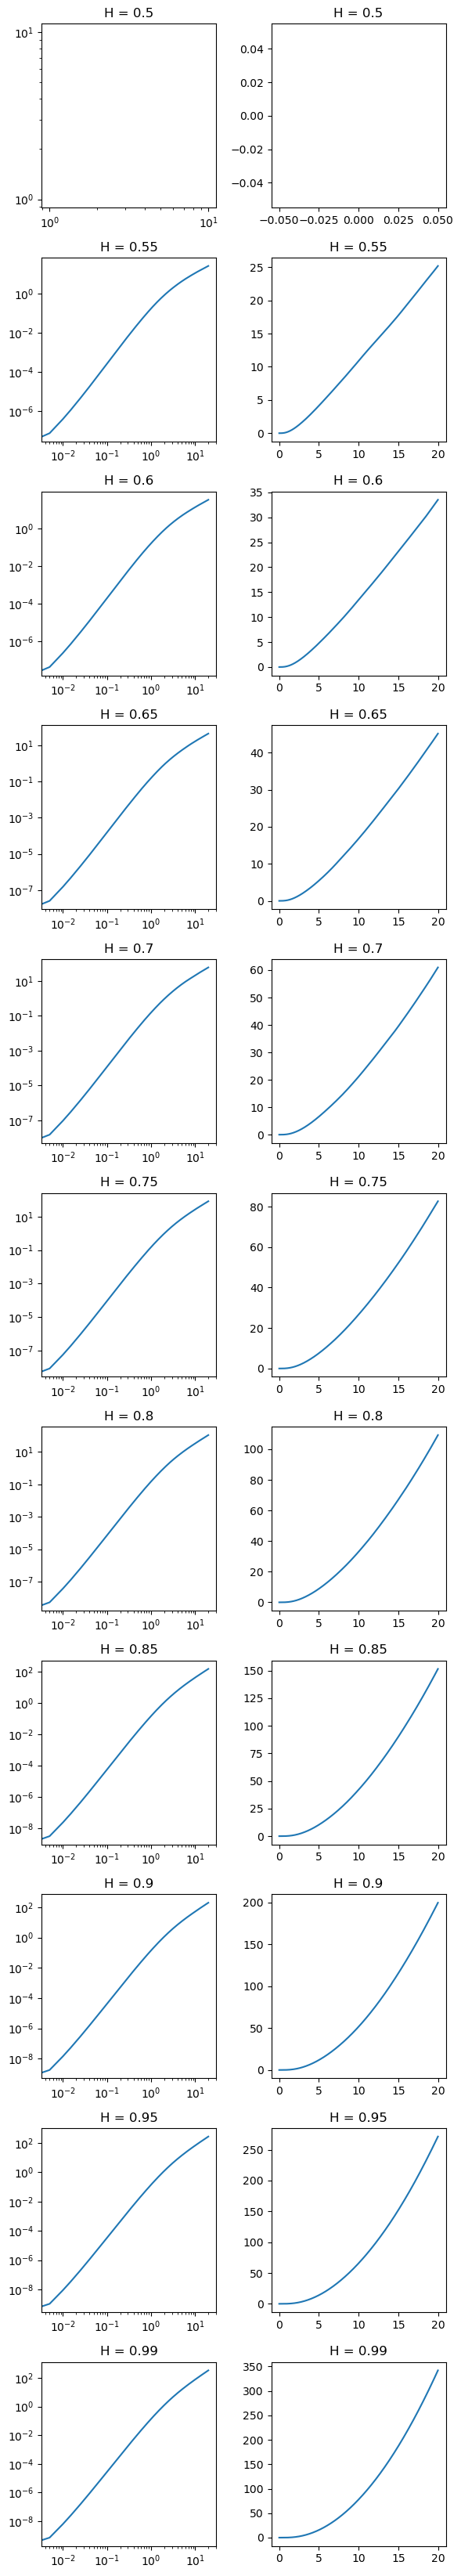

In [20]:
A = 1.0
eta = 0.0
C = 1.0
theta_H = 1.0
theta_12 = 0.0

plot_msd(A, eta, C, theta_12, theta_H)



## Case 4

$ A \frac{dq^2}{dt^2} + \eta \space {}^{C}_{O}D^{\beta}_{t}q(t) = \theta_H \xi_H + \theta_{1/2}\xi_{1/2}$

$C = 0$, superposition of both terms


0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.99


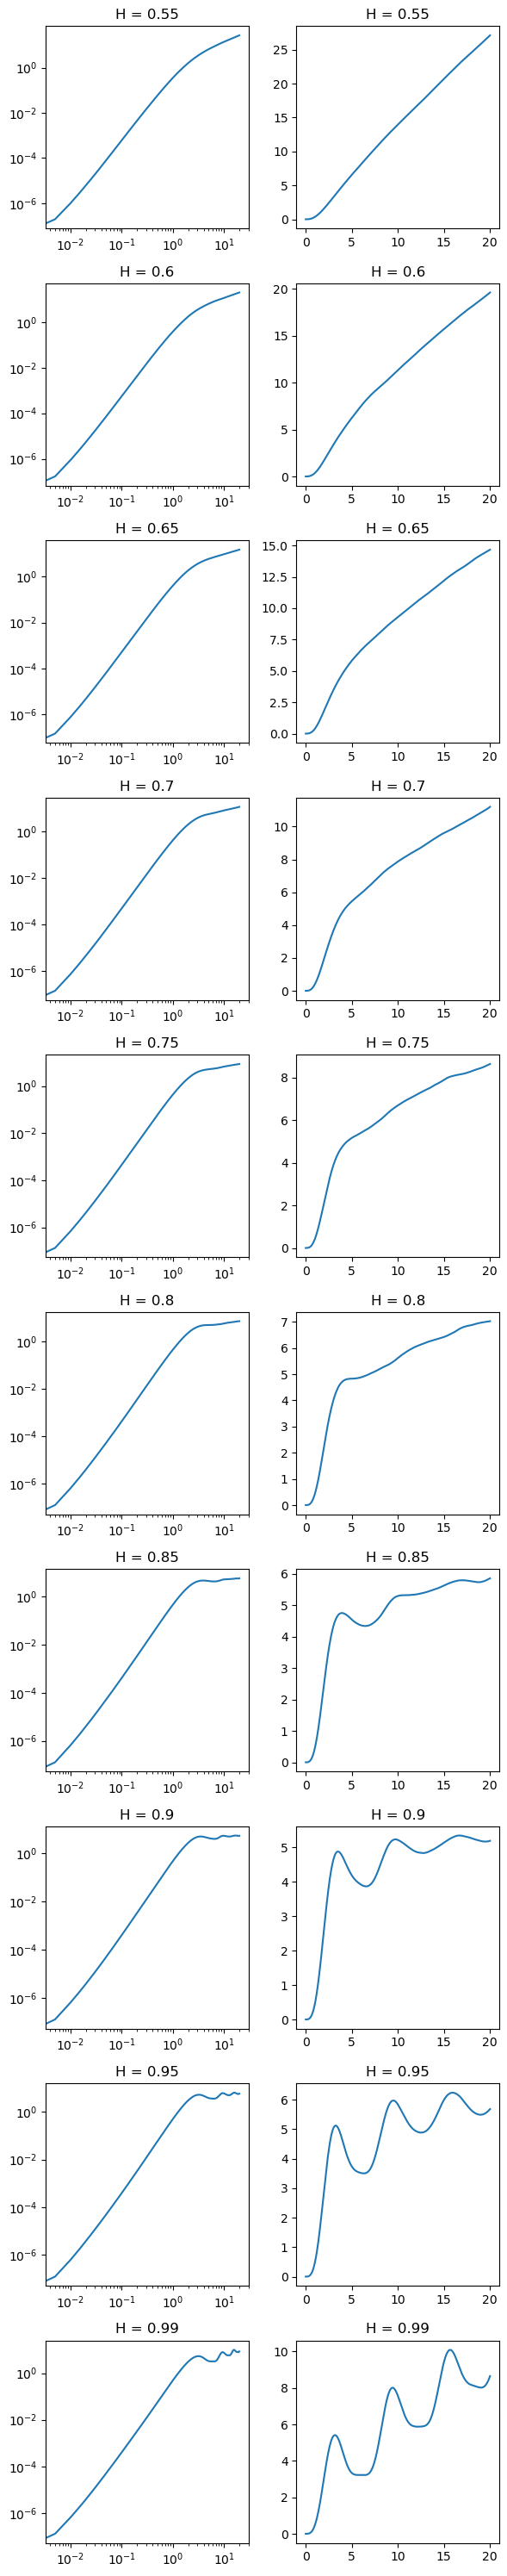

In [21]:
A = 1.0
eta = 1.0
C = 0.0
theta_H = 1.0
theta_12 = 1.0

plot_msd(A, eta, C, theta_12, theta_H)

### Case 5

$$  A \frac{dq^2}{dt^2} + \eta \space {}^{C}_{O}D^{\beta}_{t}q(t) + C \frac{dq}{dt} = \theta_H \xi_H + \theta_{1/2}\xi_{1/2}$$

$C \neq 0$, 3 regimes?

0.5
0.51
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.99


/tmp/ipykernel_100550/868147034.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[n,0].set_xscale('log')
/tmp/ipykernel_100550/868147034.py:15: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[n,0].set_yscale('log')


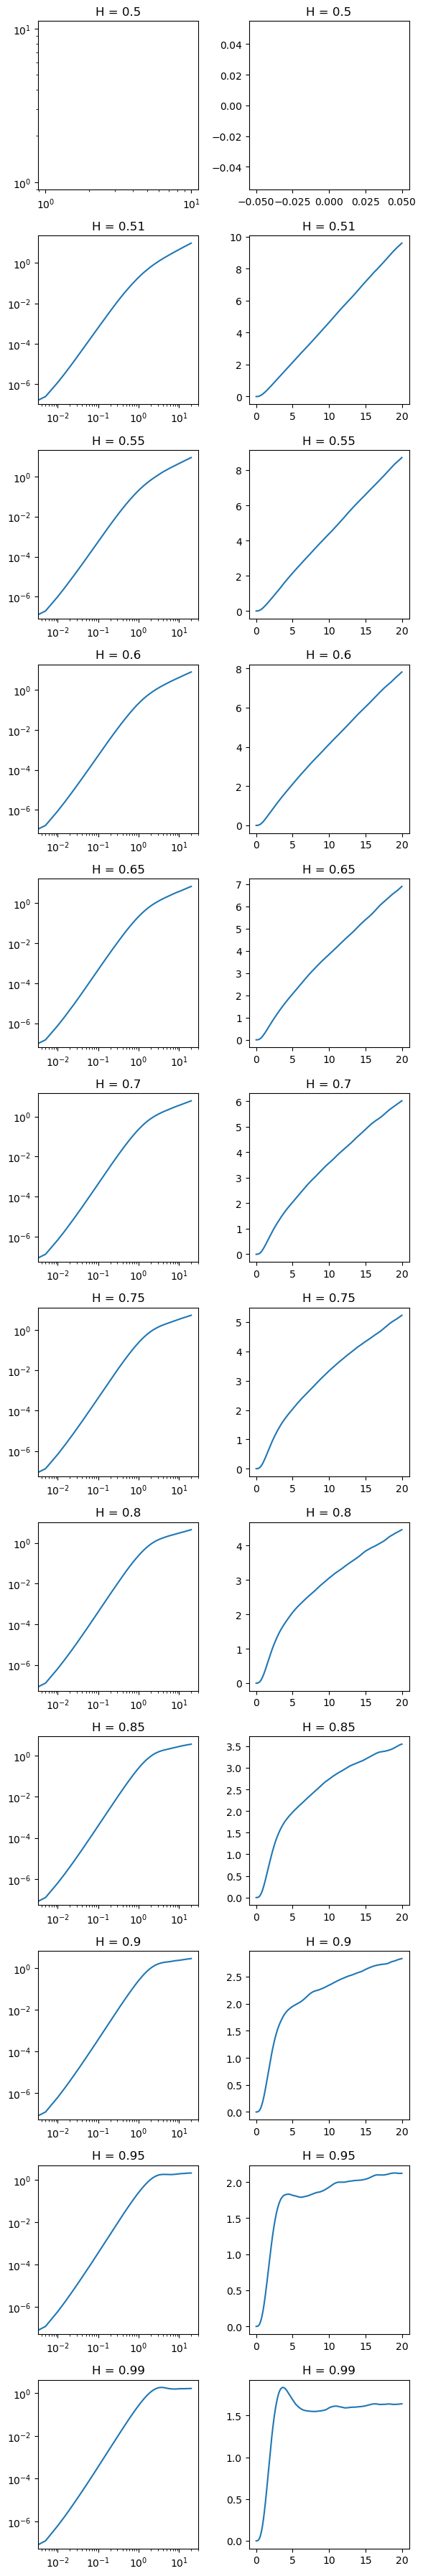

In [22]:
A = 1.0
eta = 1.0
C = 1.0
theta_H = 1.0
theta_12 = 1.0

plot_msd(A, eta, C, theta_12, theta_H)